In [50]:
library(Seurat)

library(dplyr)
library(glue)
library(ggplot2)
library(patchwork)
library(cowplot)
library(stringr)
library(tidyr)
library("dplyr")
library(velocyto.R)
library(stringr)
library(SeuratWrappers)
library(DAseq)
library(dplyr)
library(Seurat)
library(ComplexHeatmap)
# https://github.com/immunogenomics/presto
library('org.Mm.eg.db')
library(clusterProfiler)
library(dplyr)
library(tibble)
library(scales)


In [28]:
clusters = c('LT-HSC.1','LT-HSC.2','ST-HSC.1','ST-HSC.2','MPP','MKP','MEP','ERP','GMP','CMP','Ery')
df_list=list()
for (c in clusters){
    df = read.table(paste("Cluster",c,".DEG.orig.ident.logFC02.FDR001.tsv",sep=""),header=T)

    df['Cluster']=c
    df['geneName']=rownames(df)
    rownames(df) <- NULL
    df_list <- append(df_list, list(df))

    
}
# function(x) { x$b <- rep(8,10);return(x)}
all_degs=Reduce(rbind,df_list)

all_degs$ENTREZID = mapIds(org.Mm.eg.db, all_degs$geneName, 'ENTREZID', 'SYMBOL')
all_degs$group <- "UP"
all_degs$group[all_degs$avg_log2FC < 0] <- "DN"
all_degs['myCluster'] <- unlist(lapply(all_degs$Cluster, function(x) {return (str_replace(x, "\\.", "-"))}))
all_degs$sc = factor(all_degs$myCluster, levels=c('LT-HSC-1','LT-HSC-2','ST-HSC-1','ST-HSC-2','MPP','MKP','MEP','ERP','GMP','CMP','Ery'))
head(all_degs)
tail(all_degs)                                

'select()' returned 1:1 mapping between keys and columns



,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,fdr,Cluster,geneName,ENTREZID,group,myCluster,sc
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
1,5.756060e-81,0.8471974,0.346,0.005,1.787429e-76,6.907272e-79,LT-HSC.1,Trim12a,76681,UP,LT-HSC-1,LT-HSC-1
2,5.791799e-64,-1.1198134,0.008,0.442,1.798527e-59,3.475079e-62,LT-HSC.1,Echdc2,52430,DN,LT-HSC-1,LT-HSC-1
3,8.276152e-55,0.5261382,1.000,1.000,2.569993e-50,3.310461e-53,LT-HSC.1,Gm42418,NA,UP,LT-HSC-1,LT-HSC-1
4,4.344522e-39,-0.3104577,1.000,1.000,1.349104e-34,1.303356e-37,LT-HSC.1,Rpl35a,57808,DN,LT-HSC-1,LT-HSC-1
5,1.984737e-32,-0.2391278,1.000,1.000,6.163204e-28,4.763369e-31,LT-HSC.1,Rps29,20090,DN,LT-HSC-1,LT-HSC-1
6,5.918950e-30,-0.2629629,1.000,1.000,1.838012e-25,1.183790e-28,LT-HSC.1,Rps15a,267019,DN,LT-HSC-1,LT-HSC-1


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,fdr,Cluster,geneName,ENTREZID,group,myCluster,sc
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
975,1.926163e-07,0.2062989,0.882,0.876,0.005981314,2.342631e-07,Ery,Hist1h2ap,NA,UP,Ery,Ery
976,8.237340e-07,-0.5428409,0.578,0.634,0.025579411,9.754744e-07,Ery,Tmsb4x,19241,DN,Ery,Ery
977,1.218764e-06,0.2462885,0.809,0.824,0.037846290,1.406267e-06,Ery,Hist1h2ae,NA,UP,Ery,Ery
978,2.055660e-06,-0.7463862,0.052,0.104,0.063834407,2.312617e-06,Ery,S100a8,20201,DN,Ery,Ery
979,1.502802e-05,0.2386026,0.927,0.944,0.466665066,1.649417e-05,Ery,Kcnq1ot1,63830,UP,Ery,Ery
980,7.581812e-05,-0.2105302,0.853,0.852,1.000000000,8.123370e-05,Ery,Ube2c,68612,DN,Ery,Ery


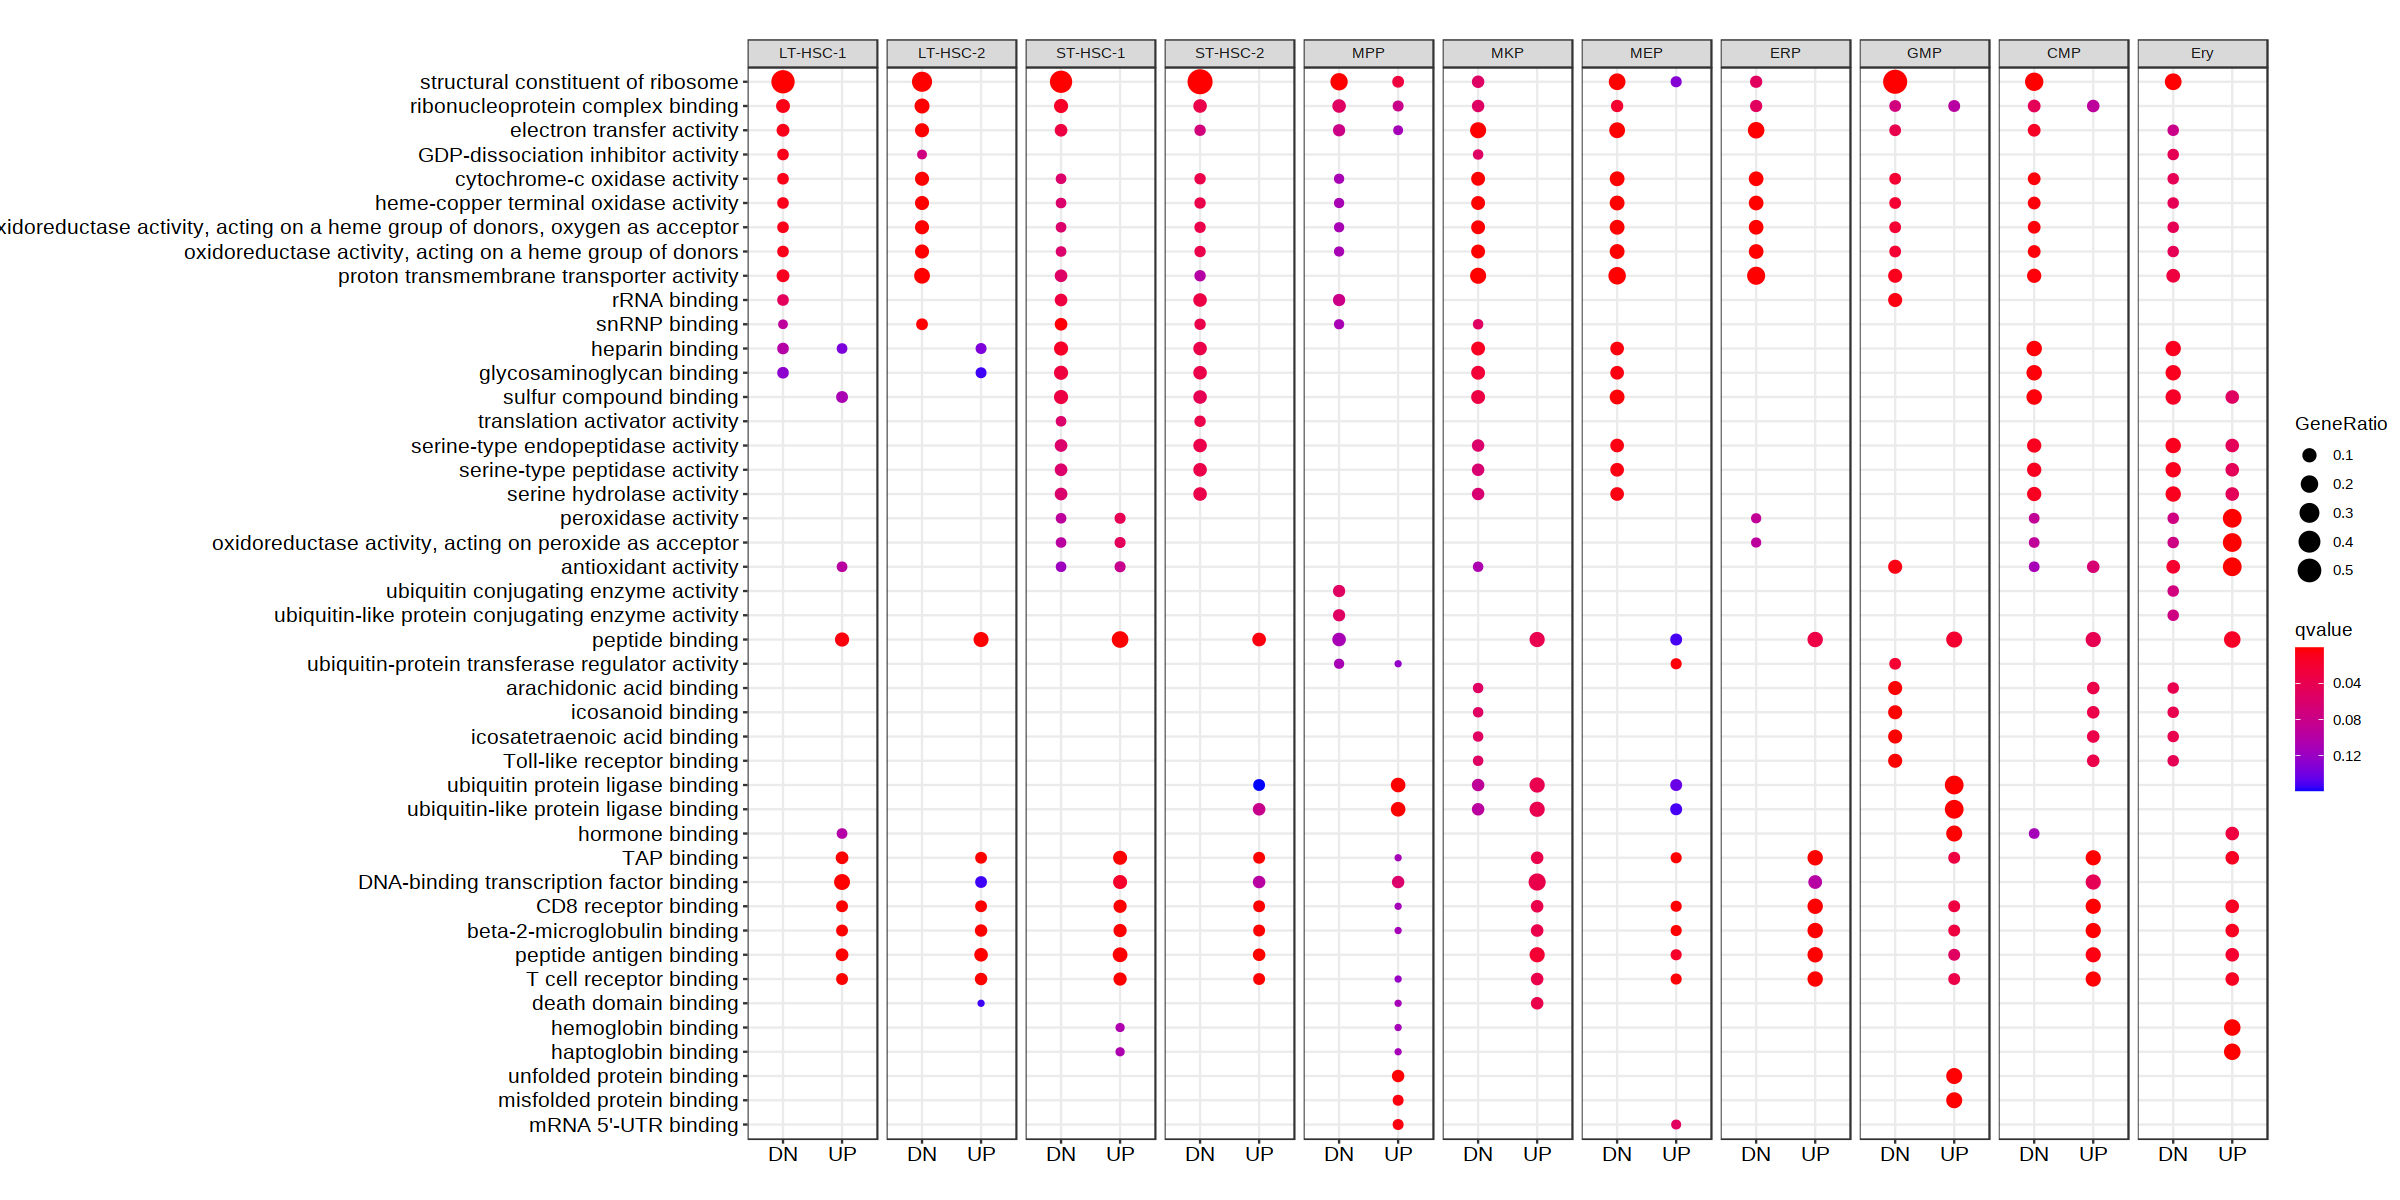

In [35]:
dotplot(formula_res_MF, x=~group,color="qvalue") + ggplot2::facet_grid(~factor(sc, levels=c('LT-HSC-1','LT-HSC-2','ST-HSC-1','ST-HSC-2','MPP','MKP','MEP','ERP','GMP','CMP','Ery')))


In [36]:
?compareCluster

compareCluster {clusterProfiler},R Documentation
geneClusters,"a list of entrez gene id. Alternatively, a formula of type Entrez~group"
fun,"One of ""groupGO"", ""enrichGO"", ""enrichKEGG"", ""enrichDO"" or ""enrichPathway"" ."
data,"if geneClusters is a formula, the data from which the clusters must be extracted."
...,Other arguments.


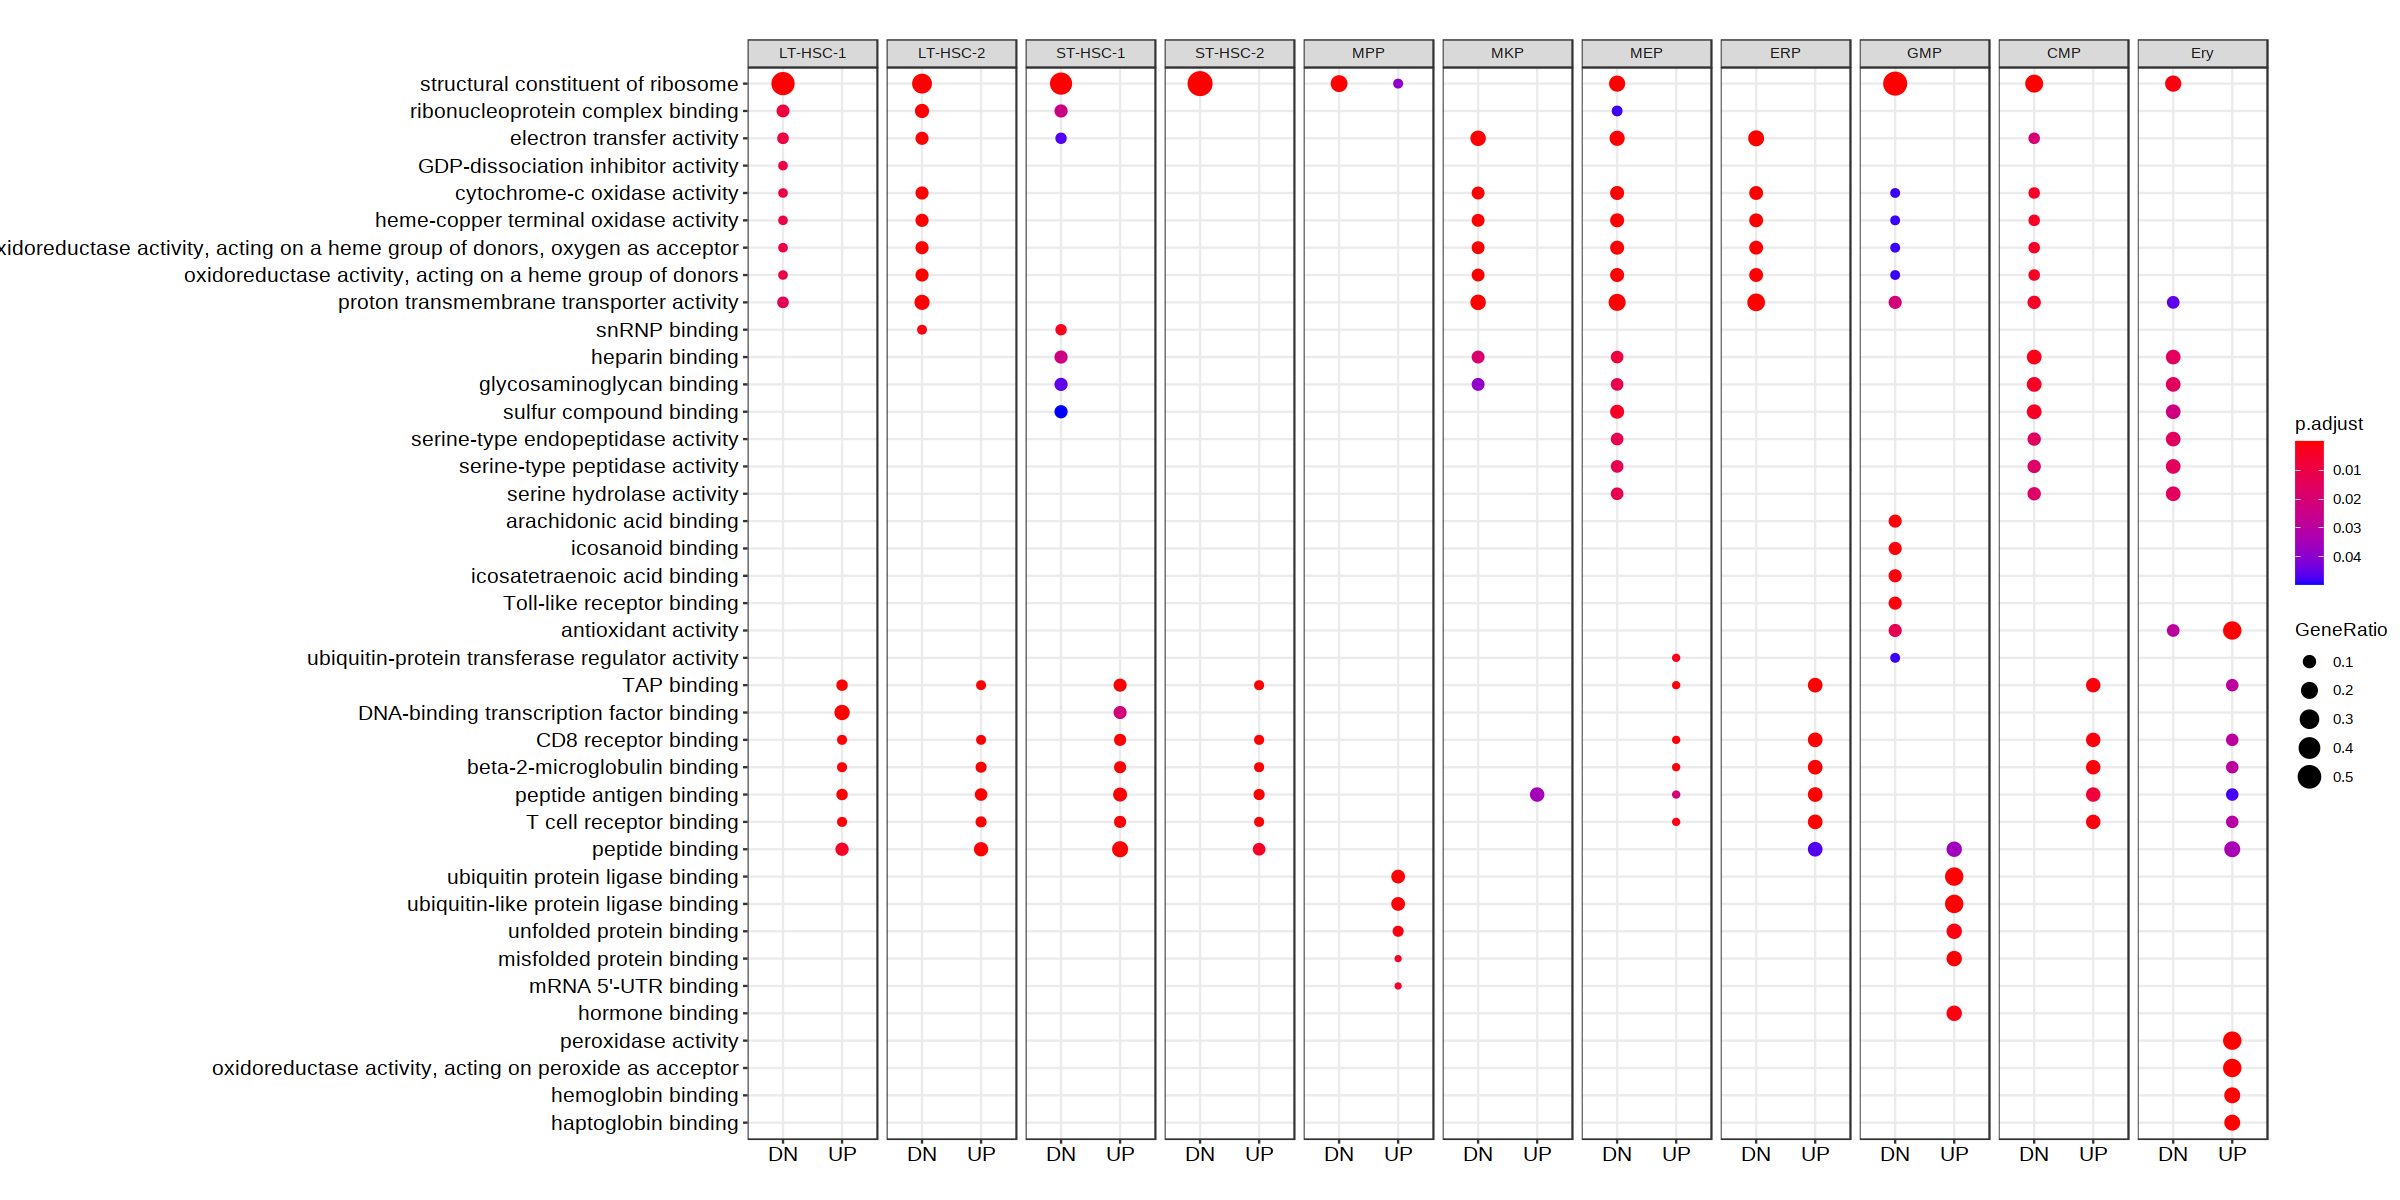

In [37]:
formula_res_MF <- compareCluster(ENTREZID~group+sc, data=all_degs, fun="enrichGO",
                                 OrgDb = org.Mm.eg.db,ont="MF")
options(repr.plot.width = 20, repr.plot.height = 10)
dotplot(formula_res_MF, x=~group) + ggplot2::facet_grid(~factor(sc, levels=c('LT-HSC-1','LT-HSC-2','ST-HSC-1','ST-HSC-2','MPP','MKP','MEP','ERP','GMP','CMP','Ery')))


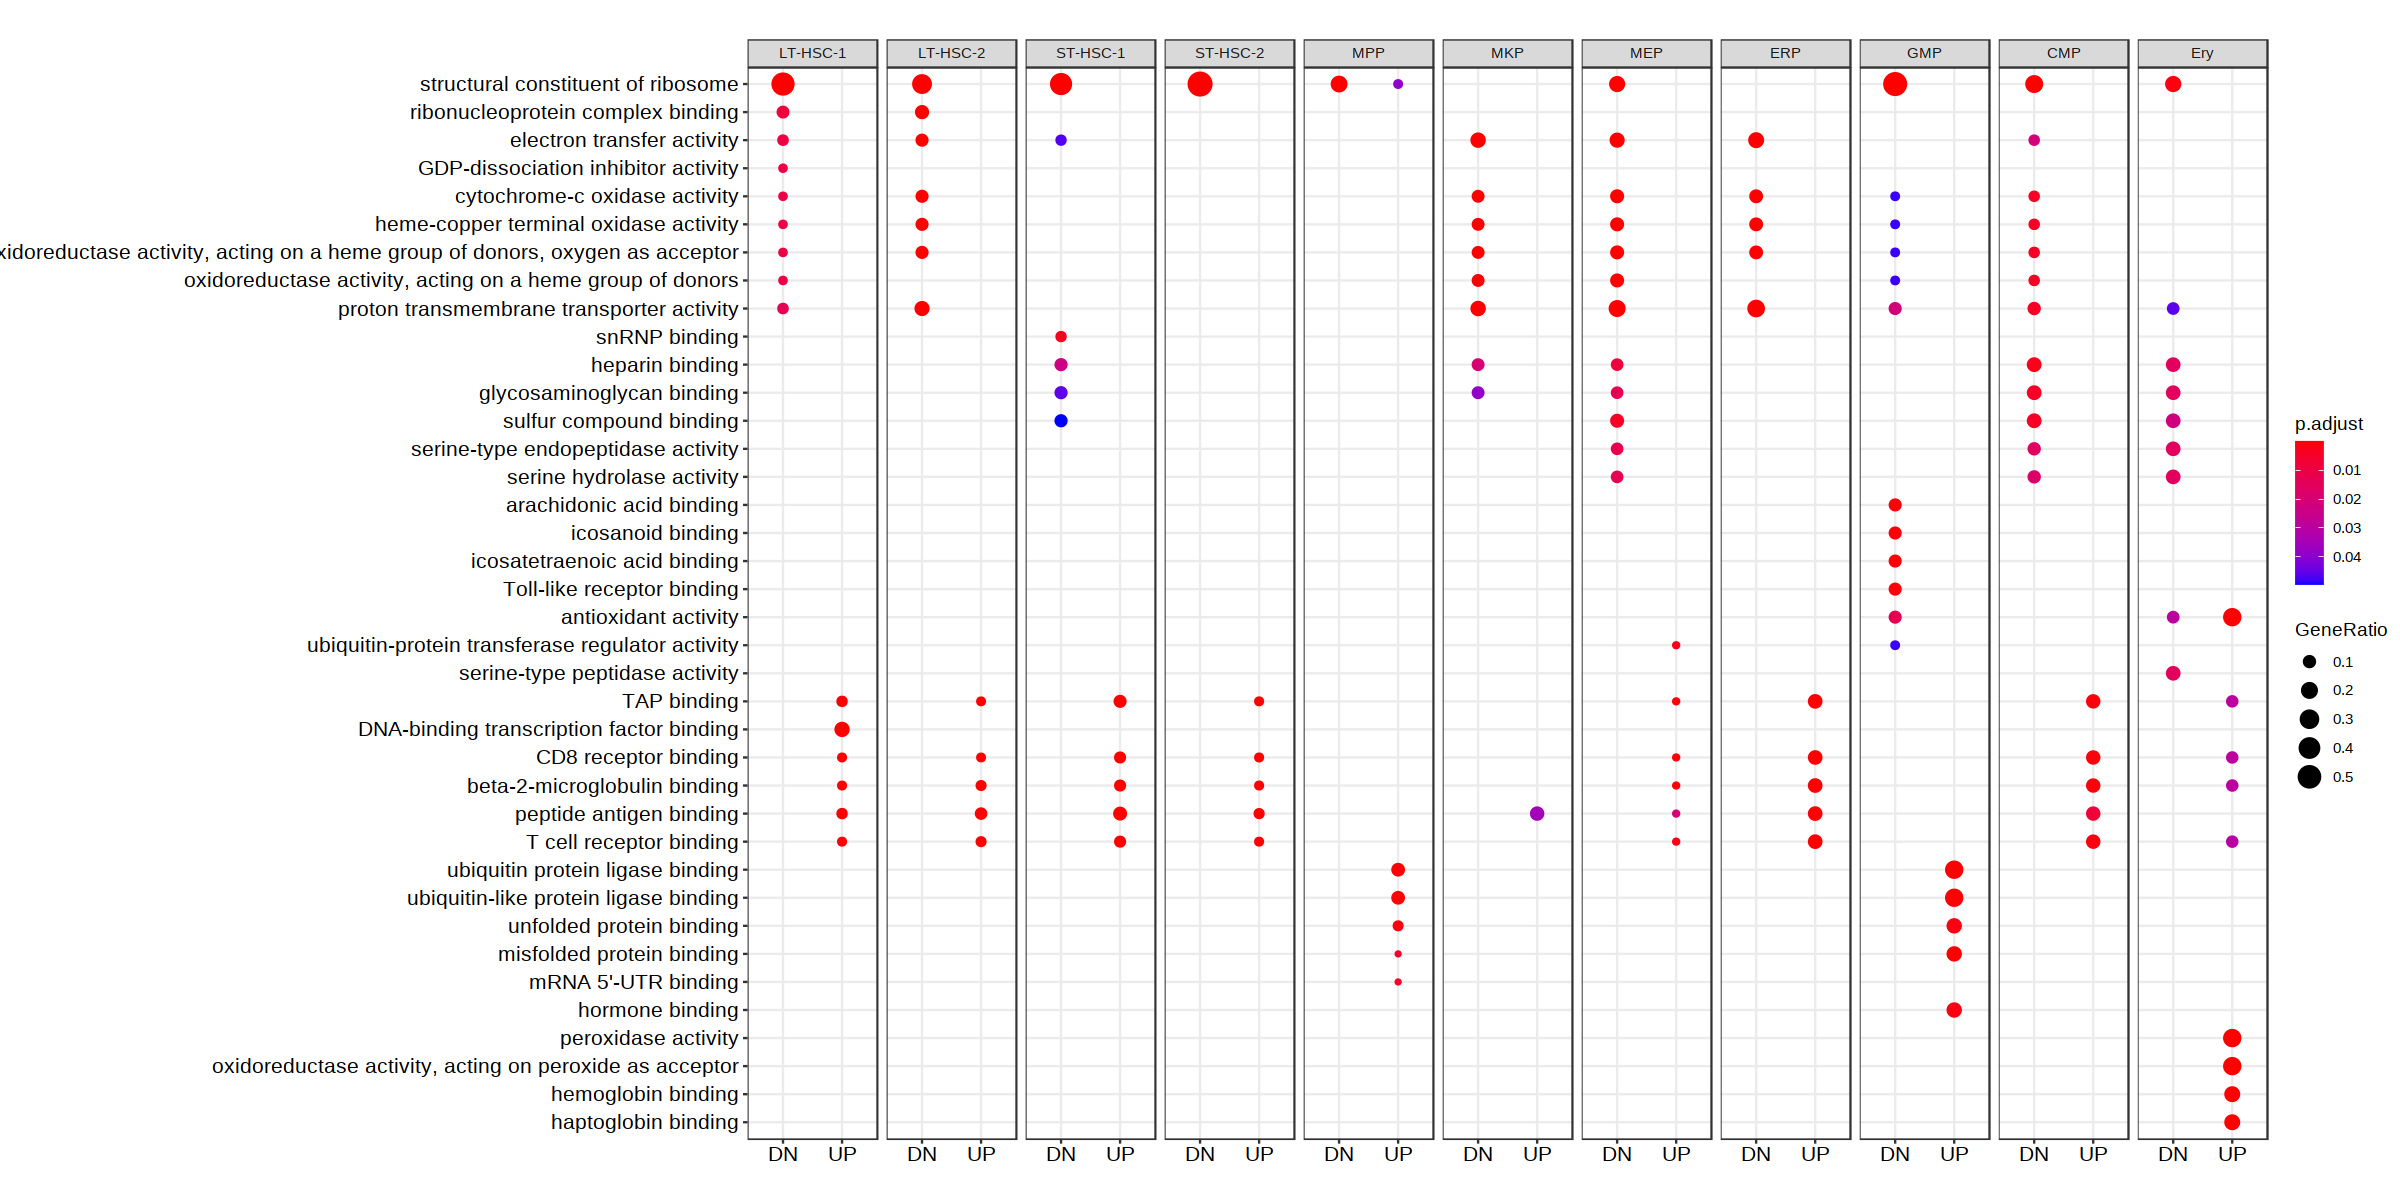

In [38]:
formula_res_MF2 <- simplify(formula_res_MF)
options(repr.plot.width = 20, repr.plot.height = 10)
dotplot(formula_res_MF2, x=~group) + ggplot2::facet_grid(~factor(sc, levels=c('LT-HSC-1','LT-HSC-2','ST-HSC-1','ST-HSC-2','MPP','MKP','MEP','ERP','GMP','CMP','Ery')))


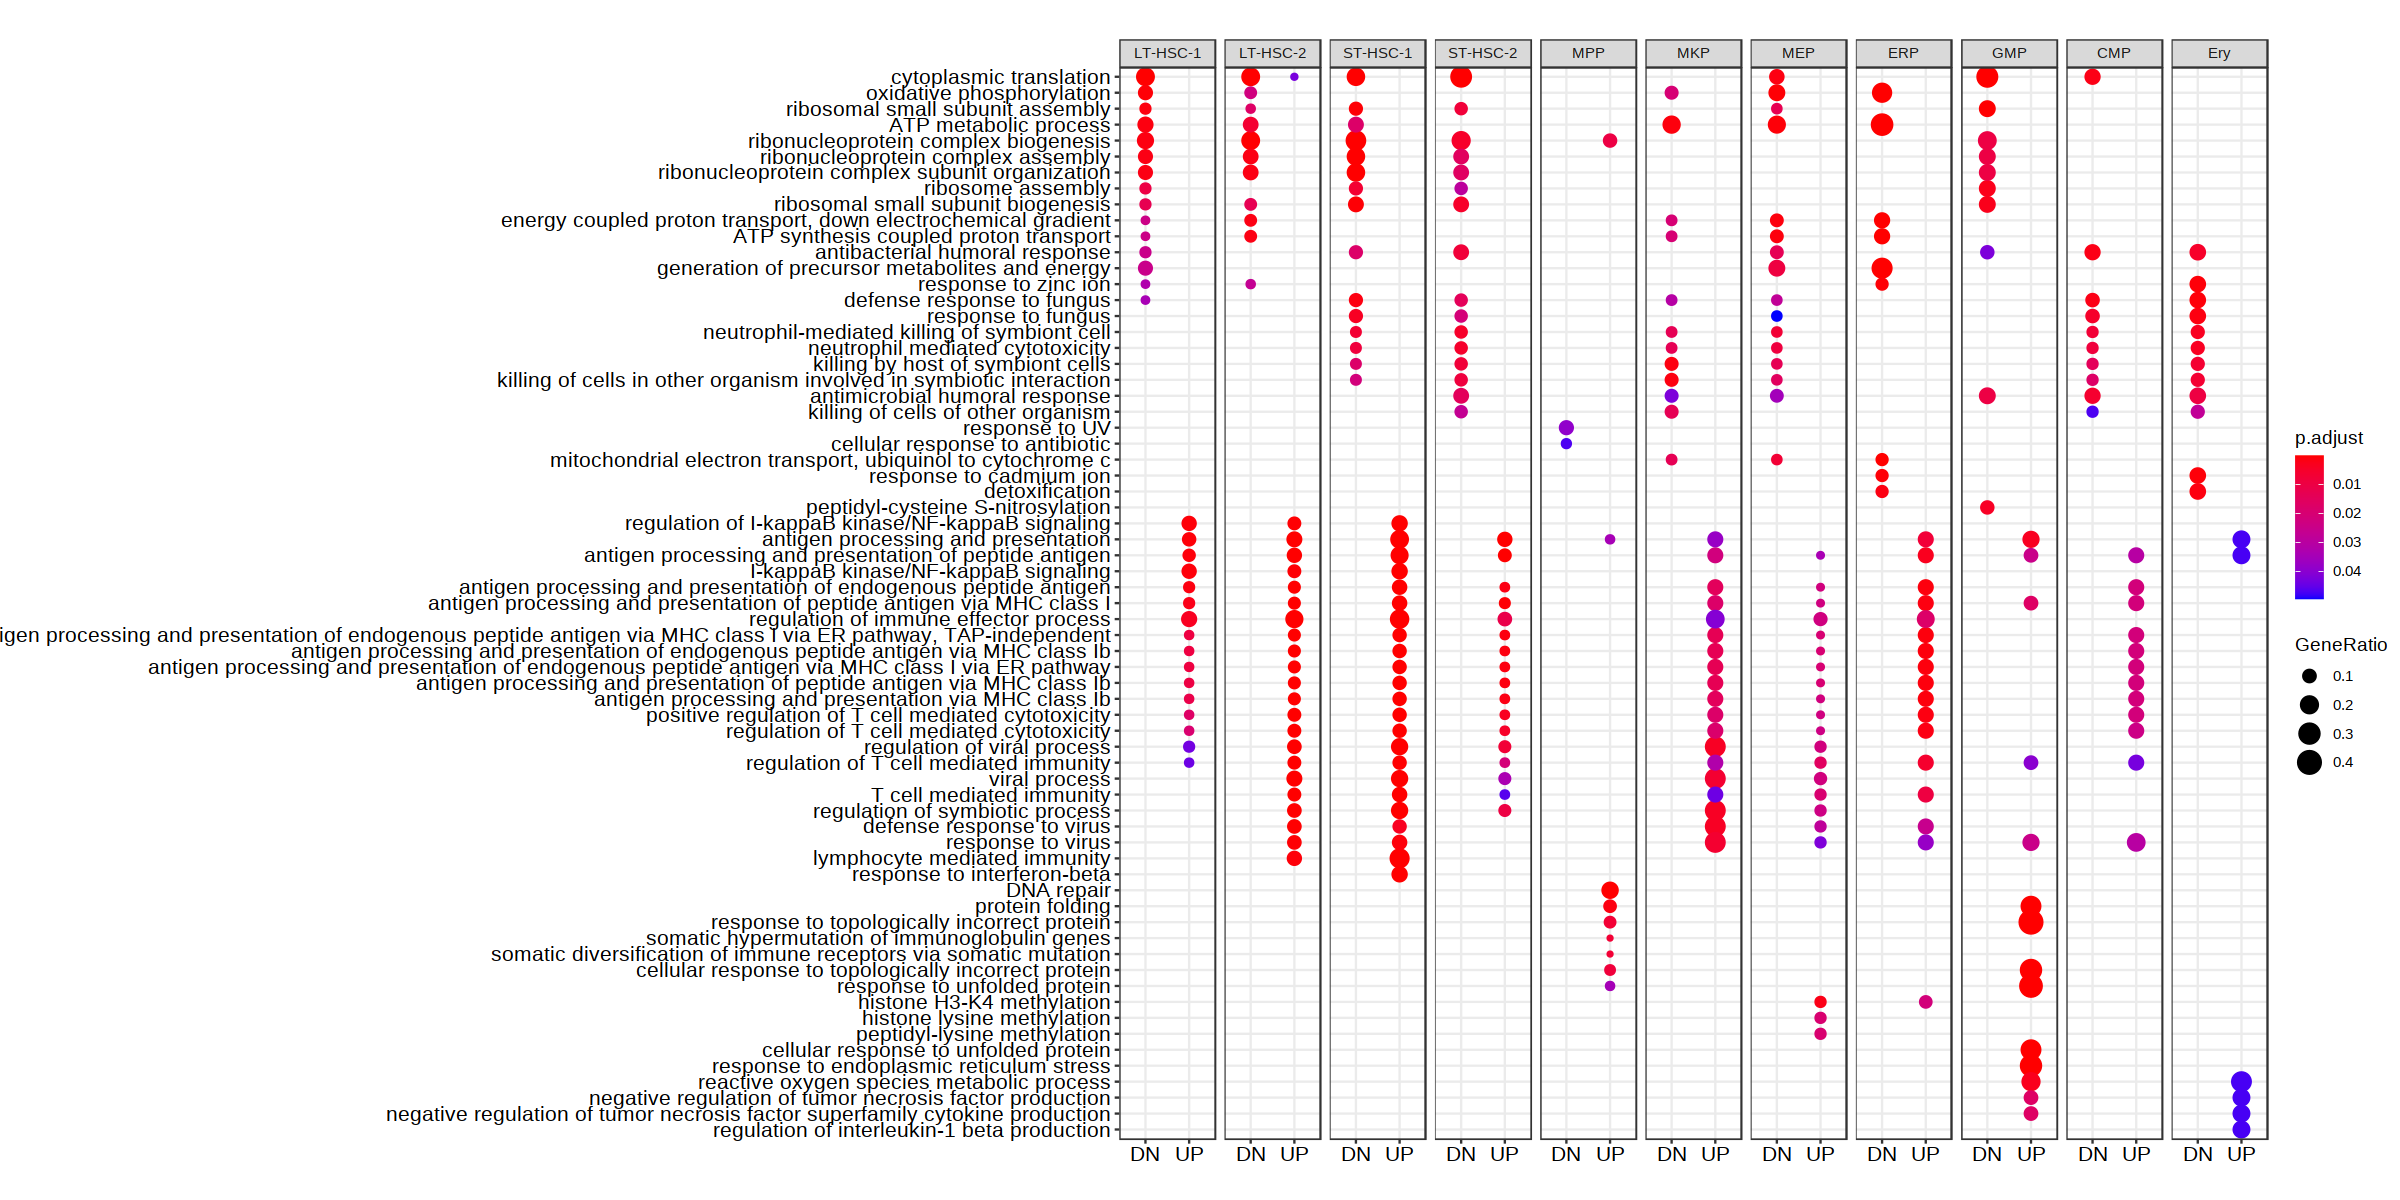

In [79]:
formula_res_BP <- compareCluster(ENTREZID~group+sc, data=all_degs, fun="enrichGO",
                                 OrgDb = org.Mm.eg.db,ont="BP")
options(repr.plot.width = 20, repr.plot.height = 10)
# formula_res_BP2 <- simplify(formula_res_BP)

dotplot(formula_res_BP, x=~group) + ggplot2::facet_grid(~factor(sc, levels=c('LT-HSC-1','LT-HSC-2','ST-HSC-1','ST-HSC-2','MPP','MKP','MEP','ERP','GMP','CMP','Ery')))


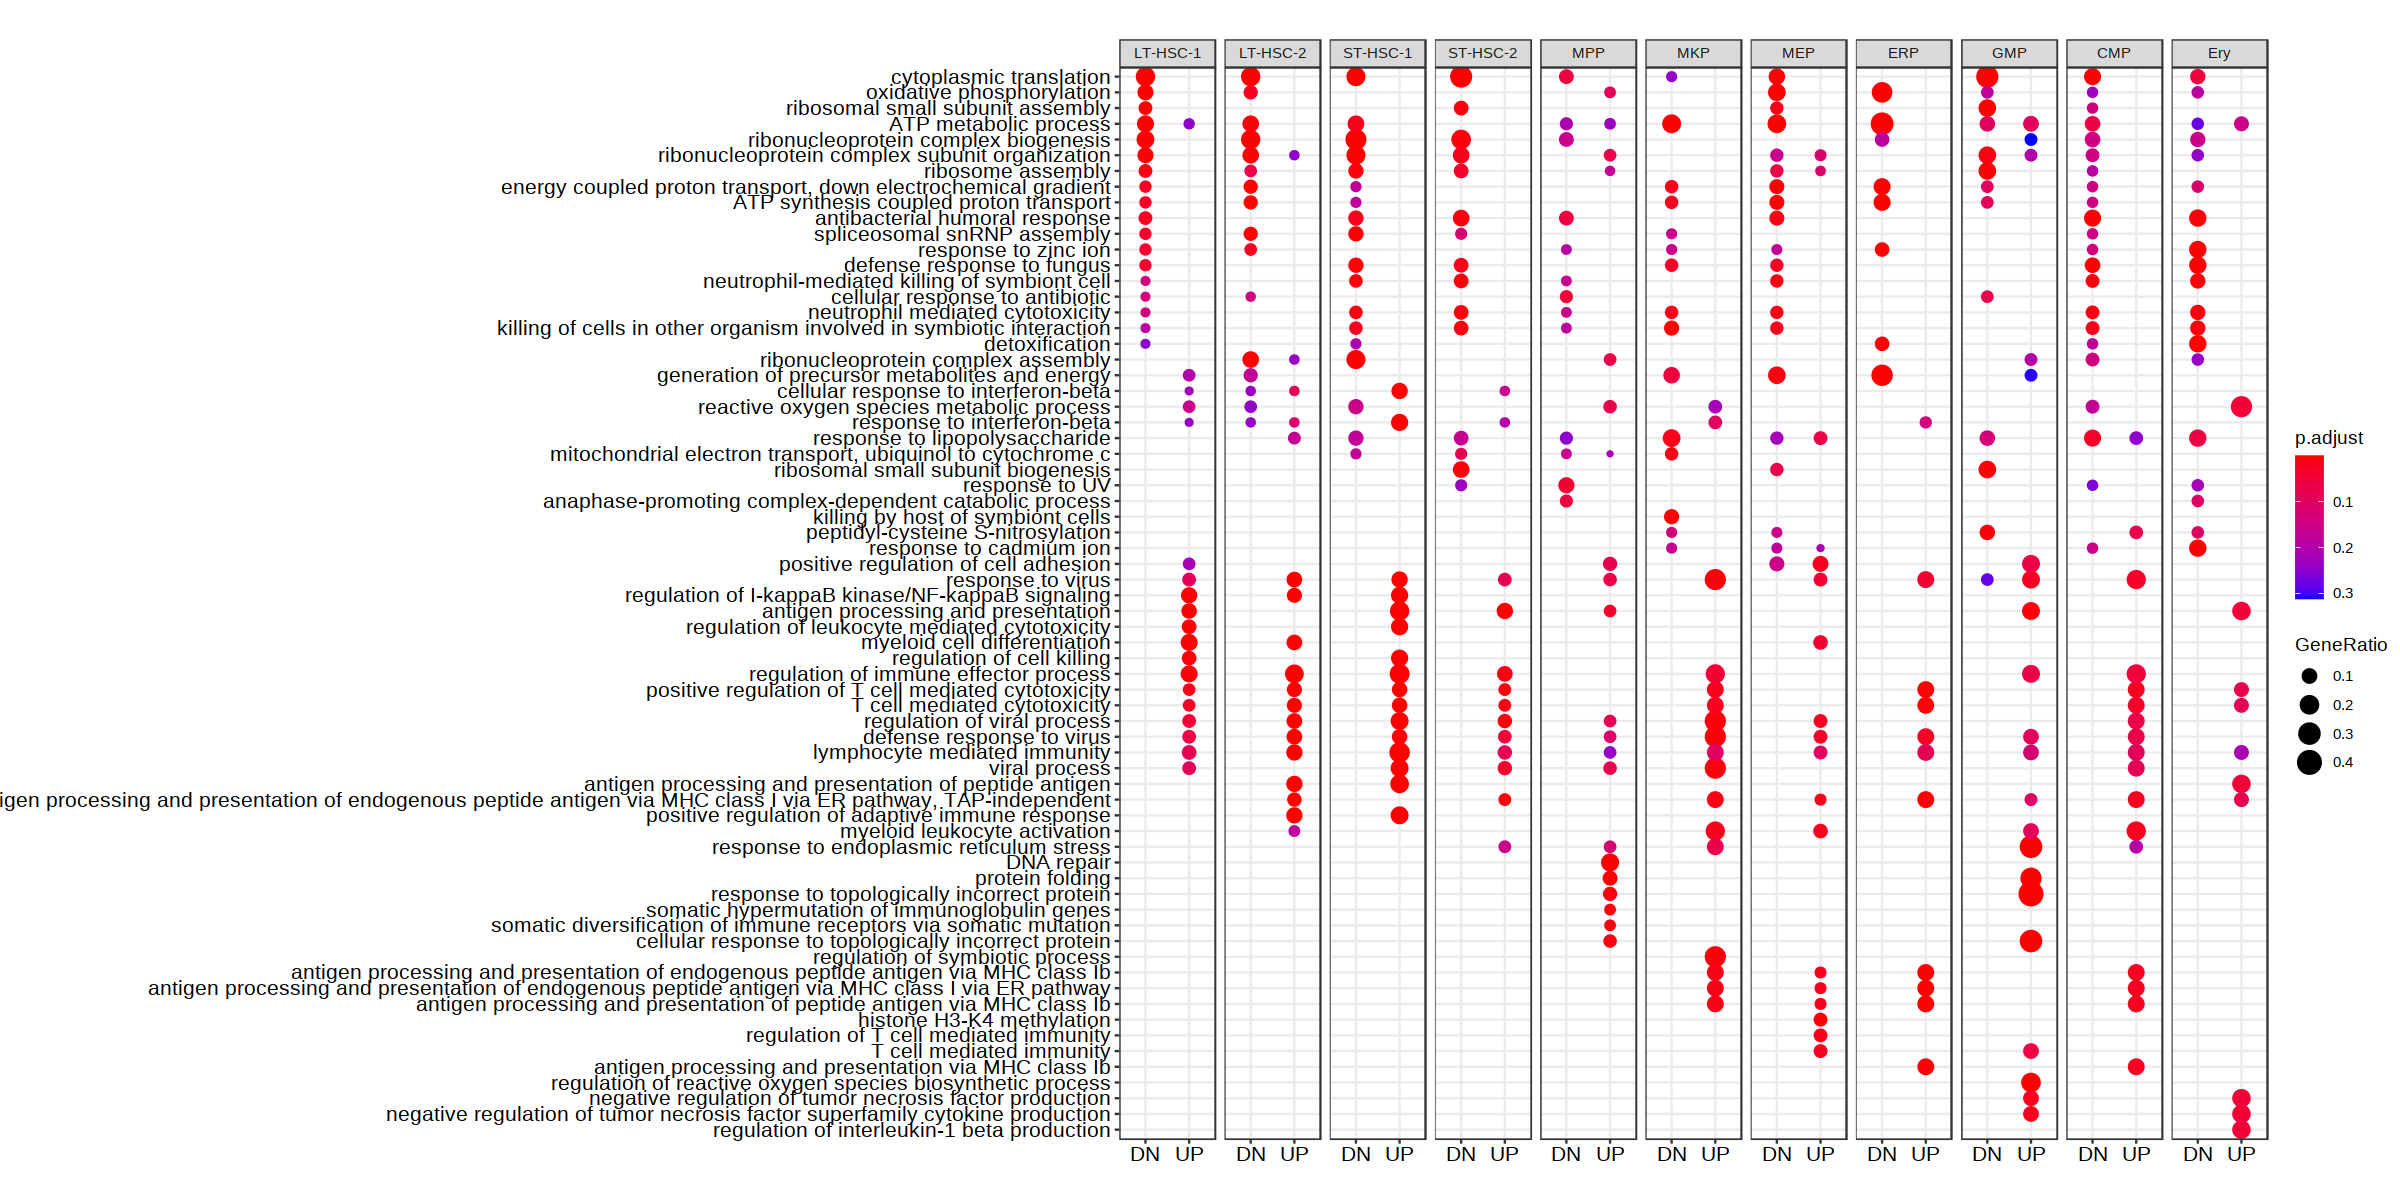

In [72]:
formula_res_BP <- compareCluster(ENTREZID~group+sc, data=all_degs, fun="enrichGO",
                                 OrgDb = org.Mm.eg.db,ont="BP",qvalueCutoff=0.2,pvalueCutoff=0.5)
options(repr.plot.width = 20, repr.plot.height = 10)
formula_res_BP2 <- simplify(formula_res_BP)

dotplot(formula_res_BP2, x=~group) + ggplot2::facet_grid(~factor(sc, levels=c('LT-HSC-1','LT-HSC-2','ST-HSC-1','ST-HSC-2','MPP','MKP','MEP','ERP','GMP','CMP','Ery')))


In [102]:
formula_res_BP2 <- simplify(formula_res_BP)

In [48]:
BiocManager::install("enrichplot")


'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.12 (BiocManager 1.30.16), R 4.0.5 (2021-03-31)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'enrichplot'”
Old packages: 'ape', 'aplot', 'backports', 'bayestestR', 'BH', 'brio', 'broom',
  'Cairo', 'car', 'carData', 'caret', 'class', 'cli', 'clue', 'clustree',
  'conquer', 'corrplot', 'cpp11', 'crayon', 'credentials', 'crosstalk',
  'datawizard', 'DBI', 'Delaporte', 'deldir', 'devtools', 'digest', 'dtplyr',
  'fansi', 'foreign', 'fs', 'future', 'generics', 'gert', 'ggfun', 'glmnet',
  'glue', 'graphlayouts', 'hdf5r', 'htmlTable', 'httpuv', 'iCellR', 'igraph',
  'insight', 'IRdisplay', 'IRkernel', 'irlba', 'jsonlite', 'knitr', 'ks',
  'lmtest', 'lubridate', 'magrittr', 'MASS', 'Matrix', 'mclust', 'memoise',
  'misc3d', 'mvtnorm', 'nlme',

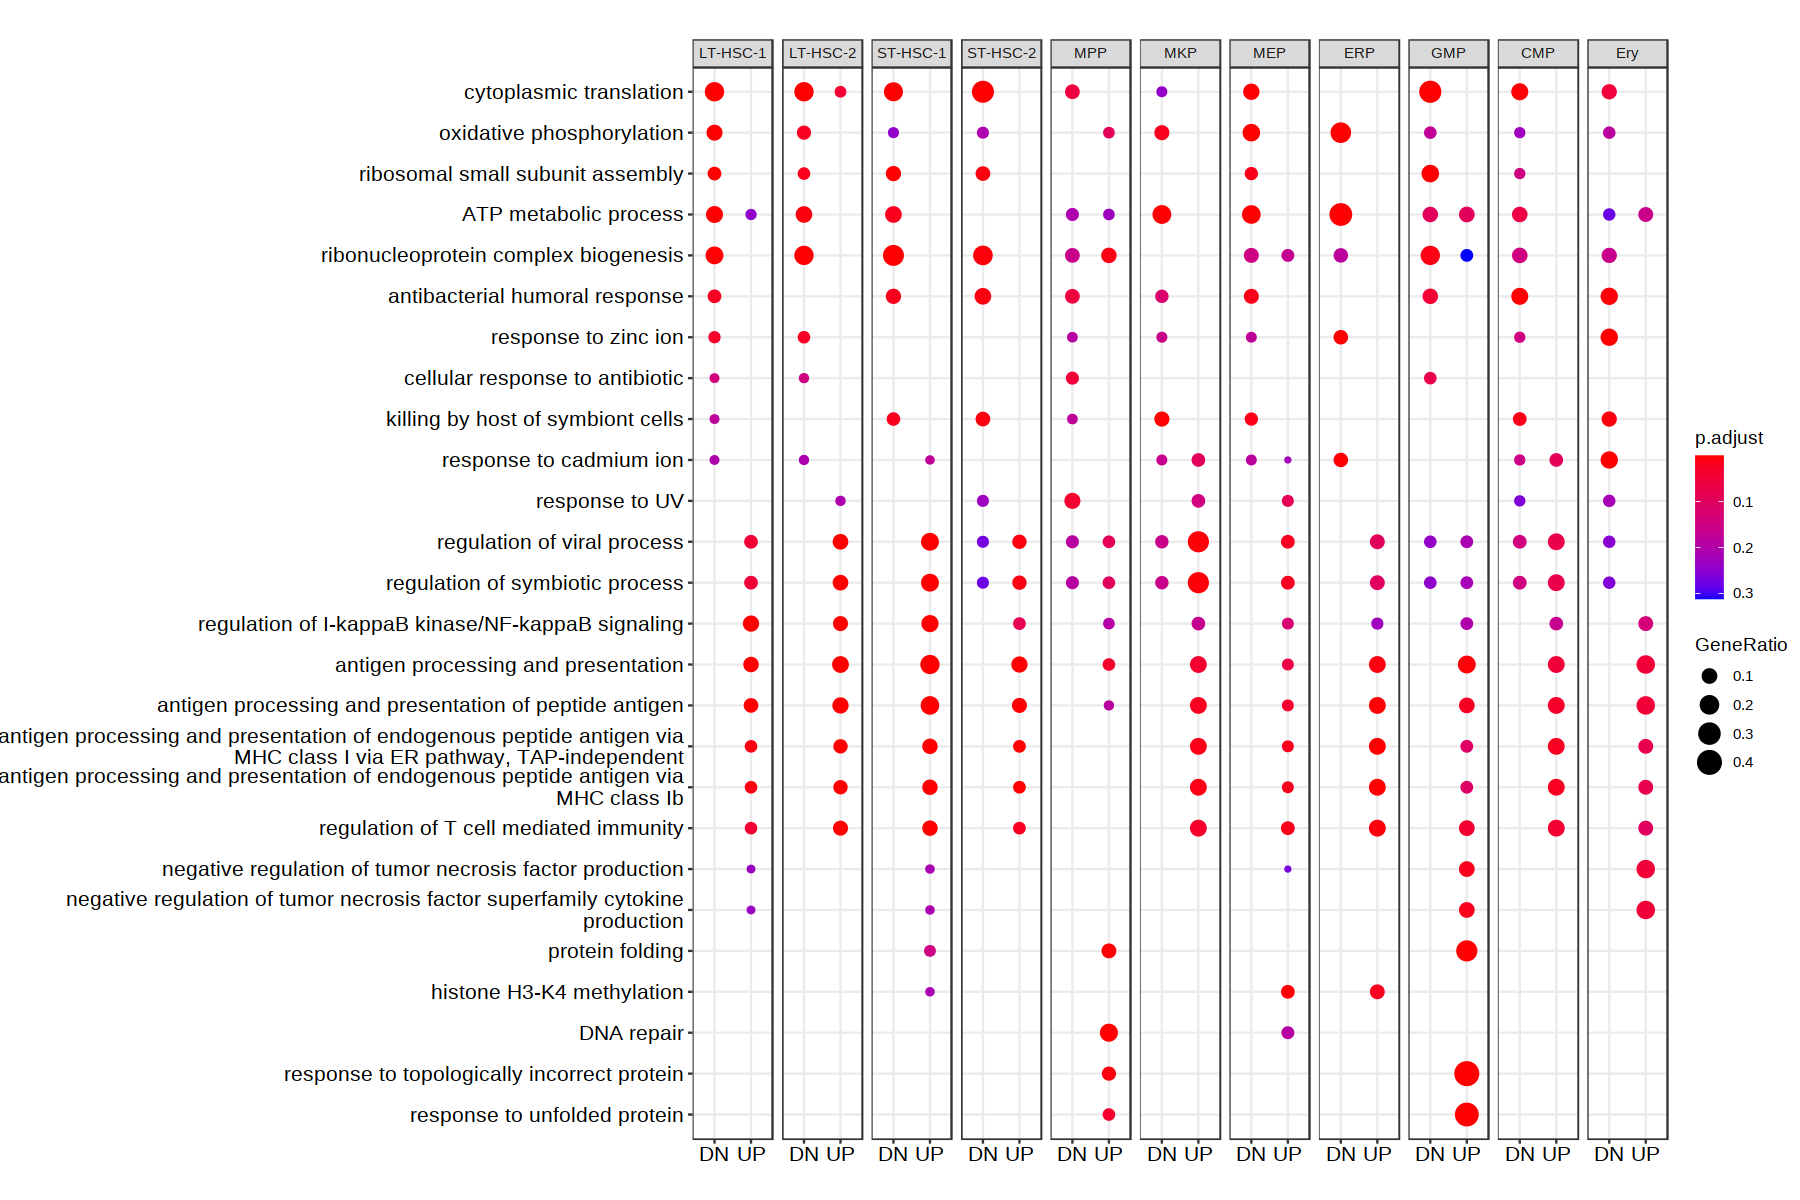

In [77]:
dotplot(formula_res_BP, x=~group,showCategory=2) + ggplot2::facet_grid(~factor(sc, levels=c('LT-HSC-1','LT-HSC-2','ST-HSC-1','ST-HSC-2','MPP','MKP','MEP','ERP','GMP','CMP','Ery')))+
scale_y_discrete(labels=function(x) str_wrap(x, width=70))

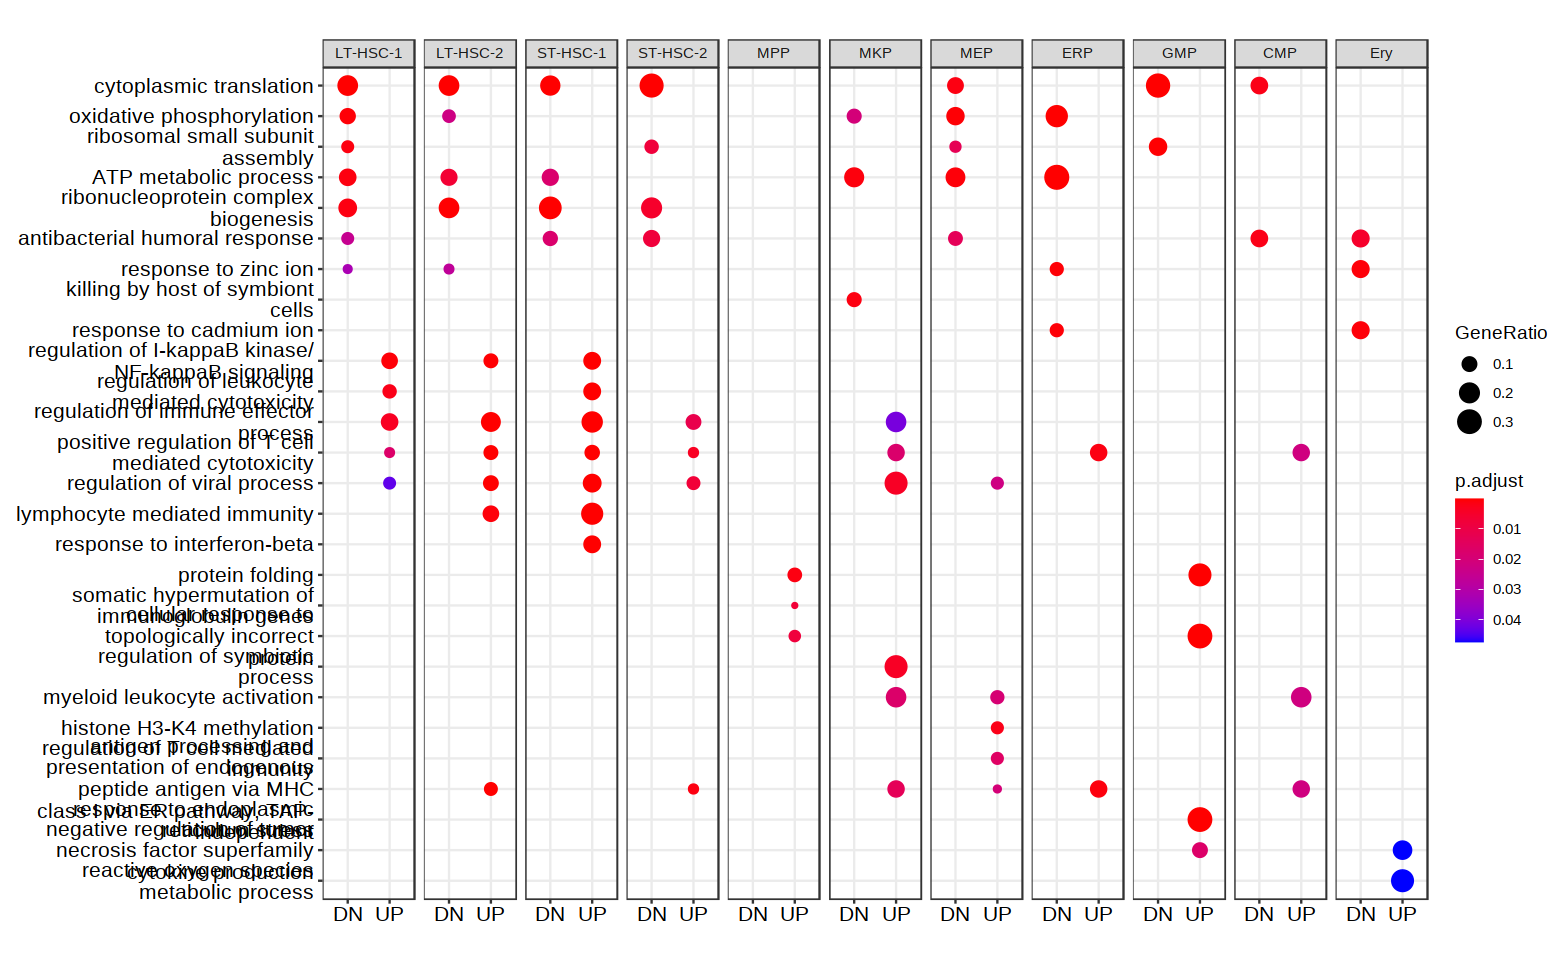

In [114]:
# formula_res_BP2 <- simplify(formula_res_BP)
 options(repr.plot.width = 13, repr.plot.height = 8)
                
dotplot(formula_res_BP2, x=~group,showCategory=2) + ggplot2::facet_grid(~factor(sc, levels=c('LT-HSC-1','LT-HSC-2','ST-HSC-1','ST-HSC-2','MPP','MKP','MEP','ERP','GMP','CMP','Ery')))+
scale_y_discrete(labels=function(x) str_wrap(x, width=30))
ggsave("DEG_DN_UP_BP.pdf",width=13,height=8)


In [91]:
write.table(formula_res_BP2@compareClusterResult,file="DEG_DN_UP_BP.tsv",sep="\t")

In [100]:
head(formula_res_BP@compareClusterResult)

,Cluster,group,sc,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,DN.LT-HSC-1,DN,LT-HSC-1,GO:0002181,cytoplasmic translation,9/47,91/23328,1.681856e-13,6.895609e-11,5.328827e-11,57808/20090/56040/67248/27370/54217/54127/67671/68028,9
2,DN.LT-HSC-1,DN,LT-HSC-1,GO:0006119,oxidative phosphorylation,5/47,108/23328,2.545585e-06,5.218448e-04,4.032742e-04,12866/67530/67267/78330/12859,5
3,DN.LT-HSC-1,DN,LT-HSC-1,GO:0000028,ribosomal small subunit assembly,3/47,21/23328,9.937593e-06,1.162964e-03,8.987222e-04,75617/54127/67671,3
4,DN.LT-HSC-1,DN,LT-HSC-1,GO:0046034,ATP metabolic process,6/47,253/23328,1.134599e-05,1.162964e-03,8.987222e-04,67126/12866/67530/67267/78330/12859,6
5,DN.LT-HSC-1,DN,LT-HSC-1,GO:0022613,ribonucleoprotein complex biogenesis,7/47,409/23328,1.661810e-05,1.362684e-03,1.053063e-03,57808/75617/54127/67671/20643/69878/66181,7
6,DN.LT-HSC-1,DN,LT-HSC-1,GO:0022618,ribonucleoprotein complex assembly,5/47,172/23328,2.454262e-05,1.677079e-03,1.296023e-03,75617/54127/67671/20643/69878,5


In [99]:
head(formula_res_BP2@compareClusterResult)

,Cluster,group,sc,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,DN.LT-HSC-1,DN,LT-HSC-1,GO:0002181,cytoplasmic translation,Sep-47,91/23328,1.68e-13,6.900000e-11,5.330000e-11,57808/20090/56040/67248/27370/54217/54127/67671/68028,9
2,DN.LT-HSC-1,DN,LT-HSC-1,GO:0006119,oxidative phosphorylation,May-47,108/23328,2.55e-06,5.218450e-04,4.032740e-04,12866/67530/67267/78330/12859,5
3,DN.LT-HSC-1,DN,LT-HSC-1,GO:0000028,ribosomal small subunit assembly,Mar-47,21/23328,9.94e-06,1.162964e-03,8.987220e-04,75617/54127/67671,3
4,DN.LT-HSC-1,DN,LT-HSC-1,GO:0046034,ATP metabolic process,Jun-47,253/23328,1.13e-05,1.162964e-03,8.987220e-04,67126/12866/67530/67267/78330/12859,6
5,DN.LT-HSC-1,DN,LT-HSC-1,GO:0022613,ribonucleoprotein complex biogenesis,Jul-47,409/23328,1.66e-05,1.362684e-03,1.053063e-03,57808/75617/54127/67671/20643/69878/66181,7
7,DN.LT-HSC-1,DN,LT-HSC-1,GO:0071826,ribonucleoprotein complex subunit organization,May-47,179/23328,2.97e-05,1.740503e-03,1.345036e-03,75617/54127/67671/20643/69878,5


In [105]:
df = read.table("DEG_DN_UP_BP.tsv",sep="\t",header=TRUE,row.names = 1)
formula_res_BP2@compareClusterResult = formula_res_BP2@compareClusterResult[rownames(df),]

In [104]:
formula_res_BP2@compareClusterResult[rownames(df),]

,Cluster,group,sc,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,DN.LT-HSC-1,DN,LT-HSC-1,GO:0002181,cytoplasmic translation,9/47,91/23328,1.681856e-13,6.895609e-11,5.328827e-11,57808/20090/56040/67248/27370/54217/54127/67671/68028,9
2,DN.LT-HSC-1,DN,LT-HSC-1,GO:0006119,oxidative phosphorylation,5/47,108/23328,2.545585e-06,5.218448e-04,4.032742e-04,12866/67530/67267/78330/12859,5
3,DN.LT-HSC-1,DN,LT-HSC-1,GO:0000028,ribosomal small subunit assembly,3/47,21/23328,9.937593e-06,1.162964e-03,8.987222e-04,75617/54127/67671,3
4,DN.LT-HSC-1,DN,LT-HSC-1,GO:0046034,ATP metabolic process,6/47,253/23328,1.134599e-05,1.162964e-03,8.987222e-04,67126/12866/67530/67267/78330/12859,6
5,DN.LT-HSC-1,DN,LT-HSC-1,GO:0022613,ribonucleoprotein complex biogenesis,7/47,409/23328,1.661810e-05,1.362684e-03,1.053063e-03,57808/75617/54127/67671/20643/69878/66181,7
7,DN.LT-HSC-1,DN,LT-HSC-1,GO:0071826,ribonucleoprotein complex subunit organization,5/47,179/23328,2.971591e-05,1.740503e-03,1.345036e-03,75617/54127/67671/20643/69878,5
8,DN.LT-HSC-1,DN,LT-HSC-1,GO:0017062,respiratory chain complex III assembly,2/47,10/23328,1.769549e-04,8.061277e-03,6.229639e-03,67530/67267,2
9,DN.LT-HSC-1,DN,LT-HSC-1,GO:0034551,mitochondrial respiratory chain complex III assembly,2/47,10/23328,1.769549e-04,8.061277e-03,6.229639e-03,67530/67267,2
13,DN.LT-HSC-1,DN,LT-HSC-1,GO:0042255,ribosome assembly,3/47,66/23328,3.208589e-04,1.011940e-02,7.820123e-03,75617/54127/67671,3


In [90]:
df = formula_res_BP2@compareClusterResult
df[!grepl("REVERSE", df$Name),]


,Cluster,group,sc,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,DN.LT-HSC-1,DN,LT-HSC-1,GO:0002181,cytoplasmic translation,9/47,91/23328,1.681856e-13,6.895609e-11,5.328827e-11,57808/20090/56040/67248/27370/54217/54127/67671/68028,9
2,DN.LT-HSC-1,DN,LT-HSC-1,GO:0006119,oxidative phosphorylation,5/47,108/23328,2.545585e-06,5.218448e-04,4.032742e-04,12866/67530/67267/78330/12859,5
3,DN.LT-HSC-1,DN,LT-HSC-1,GO:0000028,ribosomal small subunit assembly,3/47,21/23328,9.937593e-06,1.162964e-03,8.987222e-04,75617/54127/67671,3
4,DN.LT-HSC-1,DN,LT-HSC-1,GO:0046034,ATP metabolic process,6/47,253/23328,1.134599e-05,1.162964e-03,8.987222e-04,67126/12866/67530/67267/78330/12859,6
5,DN.LT-HSC-1,DN,LT-HSC-1,GO:0022613,ribonucleoprotein complex biogenesis,7/47,409/23328,1.661810e-05,1.362684e-03,1.053063e-03,57808/75617/54127/67671/20643/69878/66181,7
7,DN.LT-HSC-1,DN,LT-HSC-1,GO:0071826,ribonucleoprotein complex subunit organization,5/47,179/23328,2.971591e-05,1.740503e-03,1.345036e-03,75617/54127/67671/20643/69878,5
8,DN.LT-HSC-1,DN,LT-HSC-1,GO:0017062,respiratory chain complex III assembly,2/47,10/23328,1.769549e-04,8.061277e-03,6.229639e-03,67530/67267,2
9,DN.LT-HSC-1,DN,LT-HSC-1,GO:0034551,mitochondrial respiratory chain complex III assembly,2/47,10/23328,1.769549e-04,8.061277e-03,6.229639e-03,67530/67267,2
13,DN.LT-HSC-1,DN,LT-HSC-1,GO:0042255,ribosome assembly,3/47,66/23328,3.208589e-04,1.011940e-02,7.820123e-03,75617/54127/67671,3


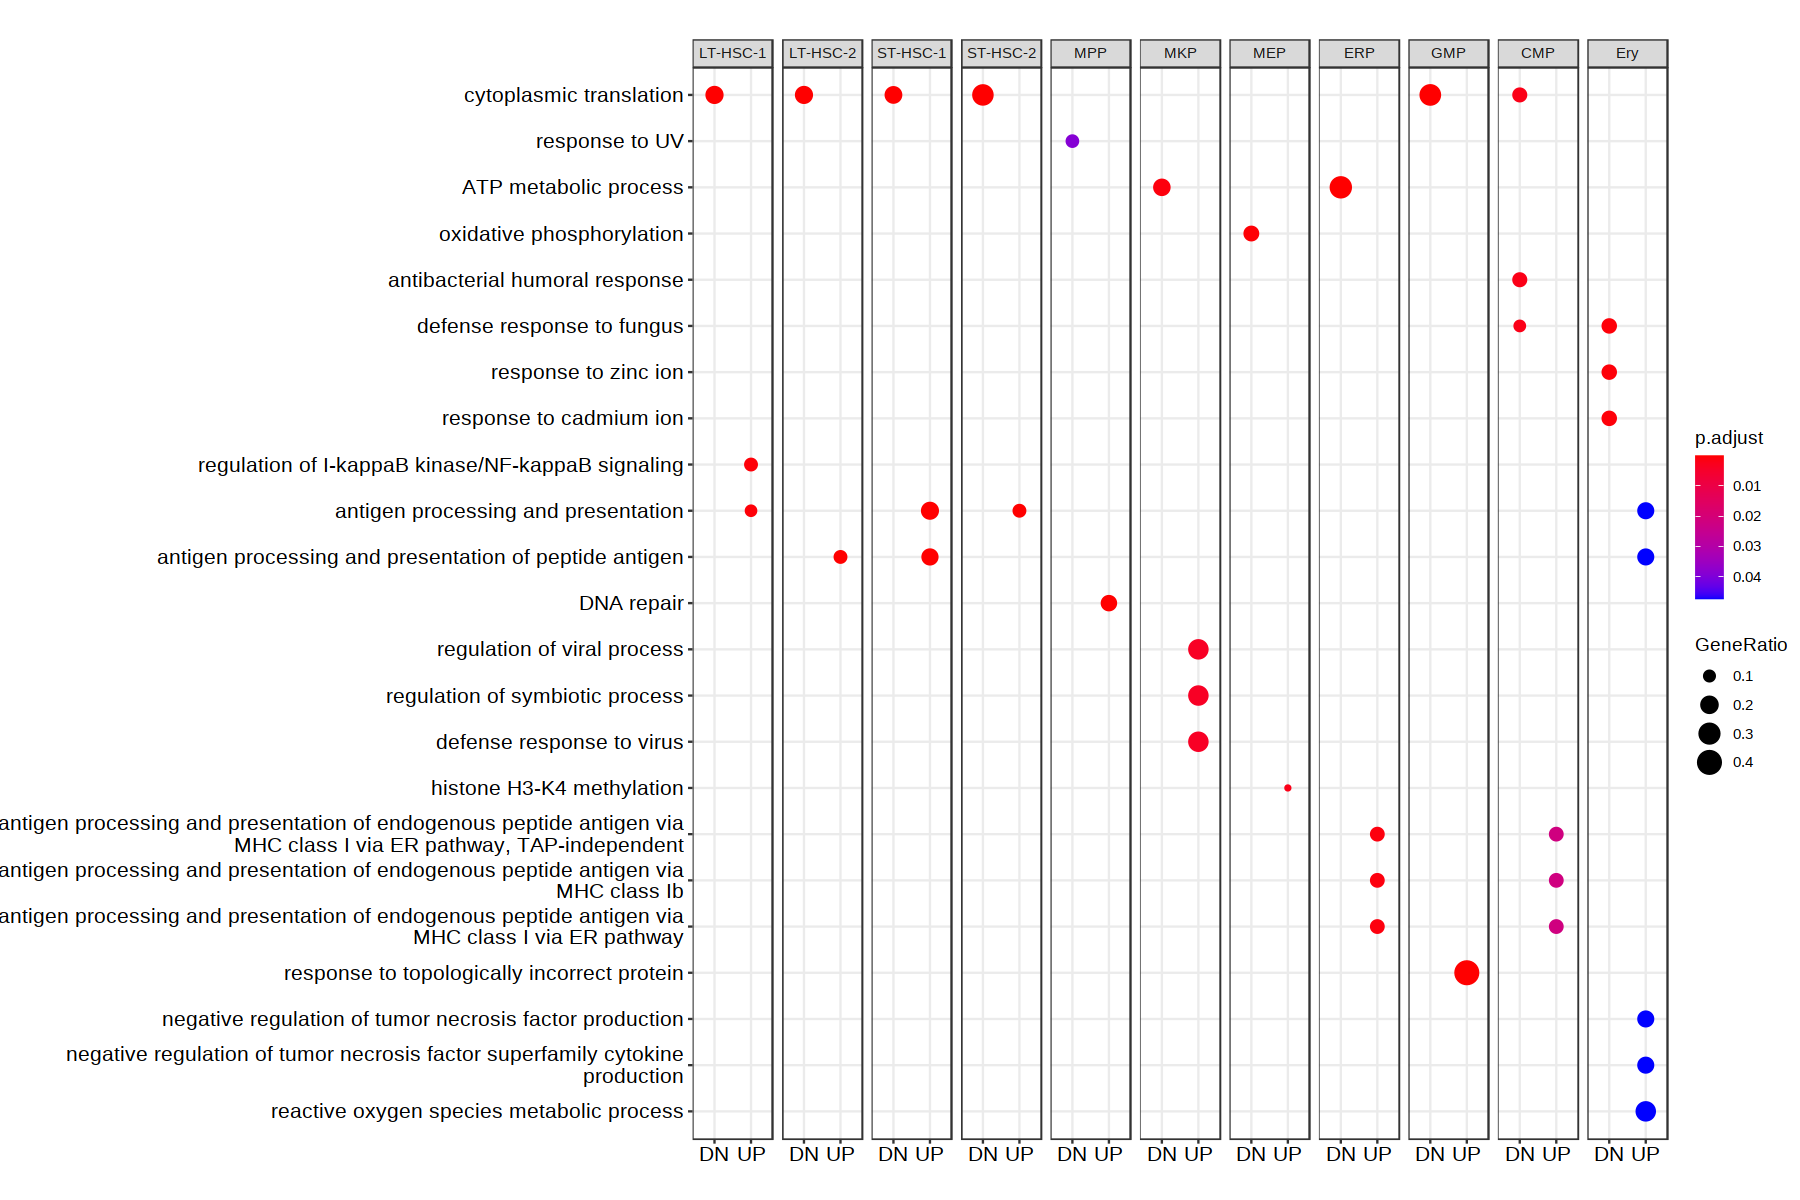

In [73]:
# library(enrichplot)
library(stringr)

options(repr.plot.width = 15, repr.plot.height = 10)
# a=dotplot(formula_res_BP2,showCategory=5,color="qvalue")+
# scale_y_discrete(labels=function(x) str_wrap(x, width=80))+
# theme(axis.text.x = element_text(angle = 45, vjust =1, hjust=1),text = element_text(size=15))
# print(a)
# ggsave("BP.pdf",width=15,height=11)
formula_res_BP2 <- simplify(formula_res_BP,cutoff=0.01)
                 
dotplot(formula_res_BP2, x=~group,showCategory=3) + ggplot2::facet_grid(~factor(sc, levels=c('LT-HSC-1','LT-HSC-2','ST-HSC-1','ST-HSC-2','MPP','MKP','MEP','ERP','GMP','CMP','Ery')))+
scale_y_discrete(labels=function(x) str_wrap(x, width=70))

In [75]:
formula_res_BP2@compareClusterResult

,Cluster,group,sc,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,DN.LT-HSC-1,DN,LT-HSC-1,GO:0002181,cytoplasmic translation,9/47,91/23328,1.681856e-13,6.895609e-11,5.328827e-11,57808/20090/56040/67248/27370/54217/54127/67671/68028,9
170,DN.LT-HSC-2,DN,LT-HSC-2,GO:0002181,cytoplasmic translation,8/42,91/23328,4.145515e-12,2.425126e-09,1.933119e-09,20090/67248/56040/54217/57808/27370/68028/67671,8
418,DN.ST-HSC-1,DN,ST-HSC-1,GO:0002181,cytoplasmic translation,6/33,91/23328,3.033078e-09,2.068559e-06,1.612320e-06,20090/57808/27370/67248/54127/68028,6
848,DN.ST-HSC-2,DN,ST-HSC-2,GO:0002181,cytoplasmic translation,7/25,91/23328,4.932214e-12,1.326766e-09,9.449084e-10,54127/57808/20090/27370/67248/66481/68028,7
1055,DN.MPP,DN,MPP,GO:0009411,response to UV,4/37,138/23328,6.653653e-05,3.905694e-02,3.046673e-02,12925/15574/12696/50701,4
1342,DN.MKP,DN,MKP,GO:0046034,ATP metabolic process,6/34,253/23328,1.598945e-06,9.897467e-04,7.220497e-04,67126/12866/22272/11958/67530/18648,6
1703,DN.MEP,DN,MEP,GO:0006119,oxidative phosphorylation,5/35,108/23328,5.630377e-07,3.839917e-04,2.939649e-04,22272/27425/57423/67530/12867,5
2115,DN.ERP,DN,ERP,GO:0046034,ATP metabolic process,12/39,253/23328,6.151345e-15,4.681173e-12,3.749083e-12,67126/22272/27425/67267/66152/12867/12859/57423/17319/67530/11958/12866,12
2523,DN.GMP,DN,GMP,GO:0002181,cytoplasmic translation,6/21,91/23328,1.542843e-10,4.319960e-08,2.923281e-08,67248/20090/57808/54127/67671/27370,6


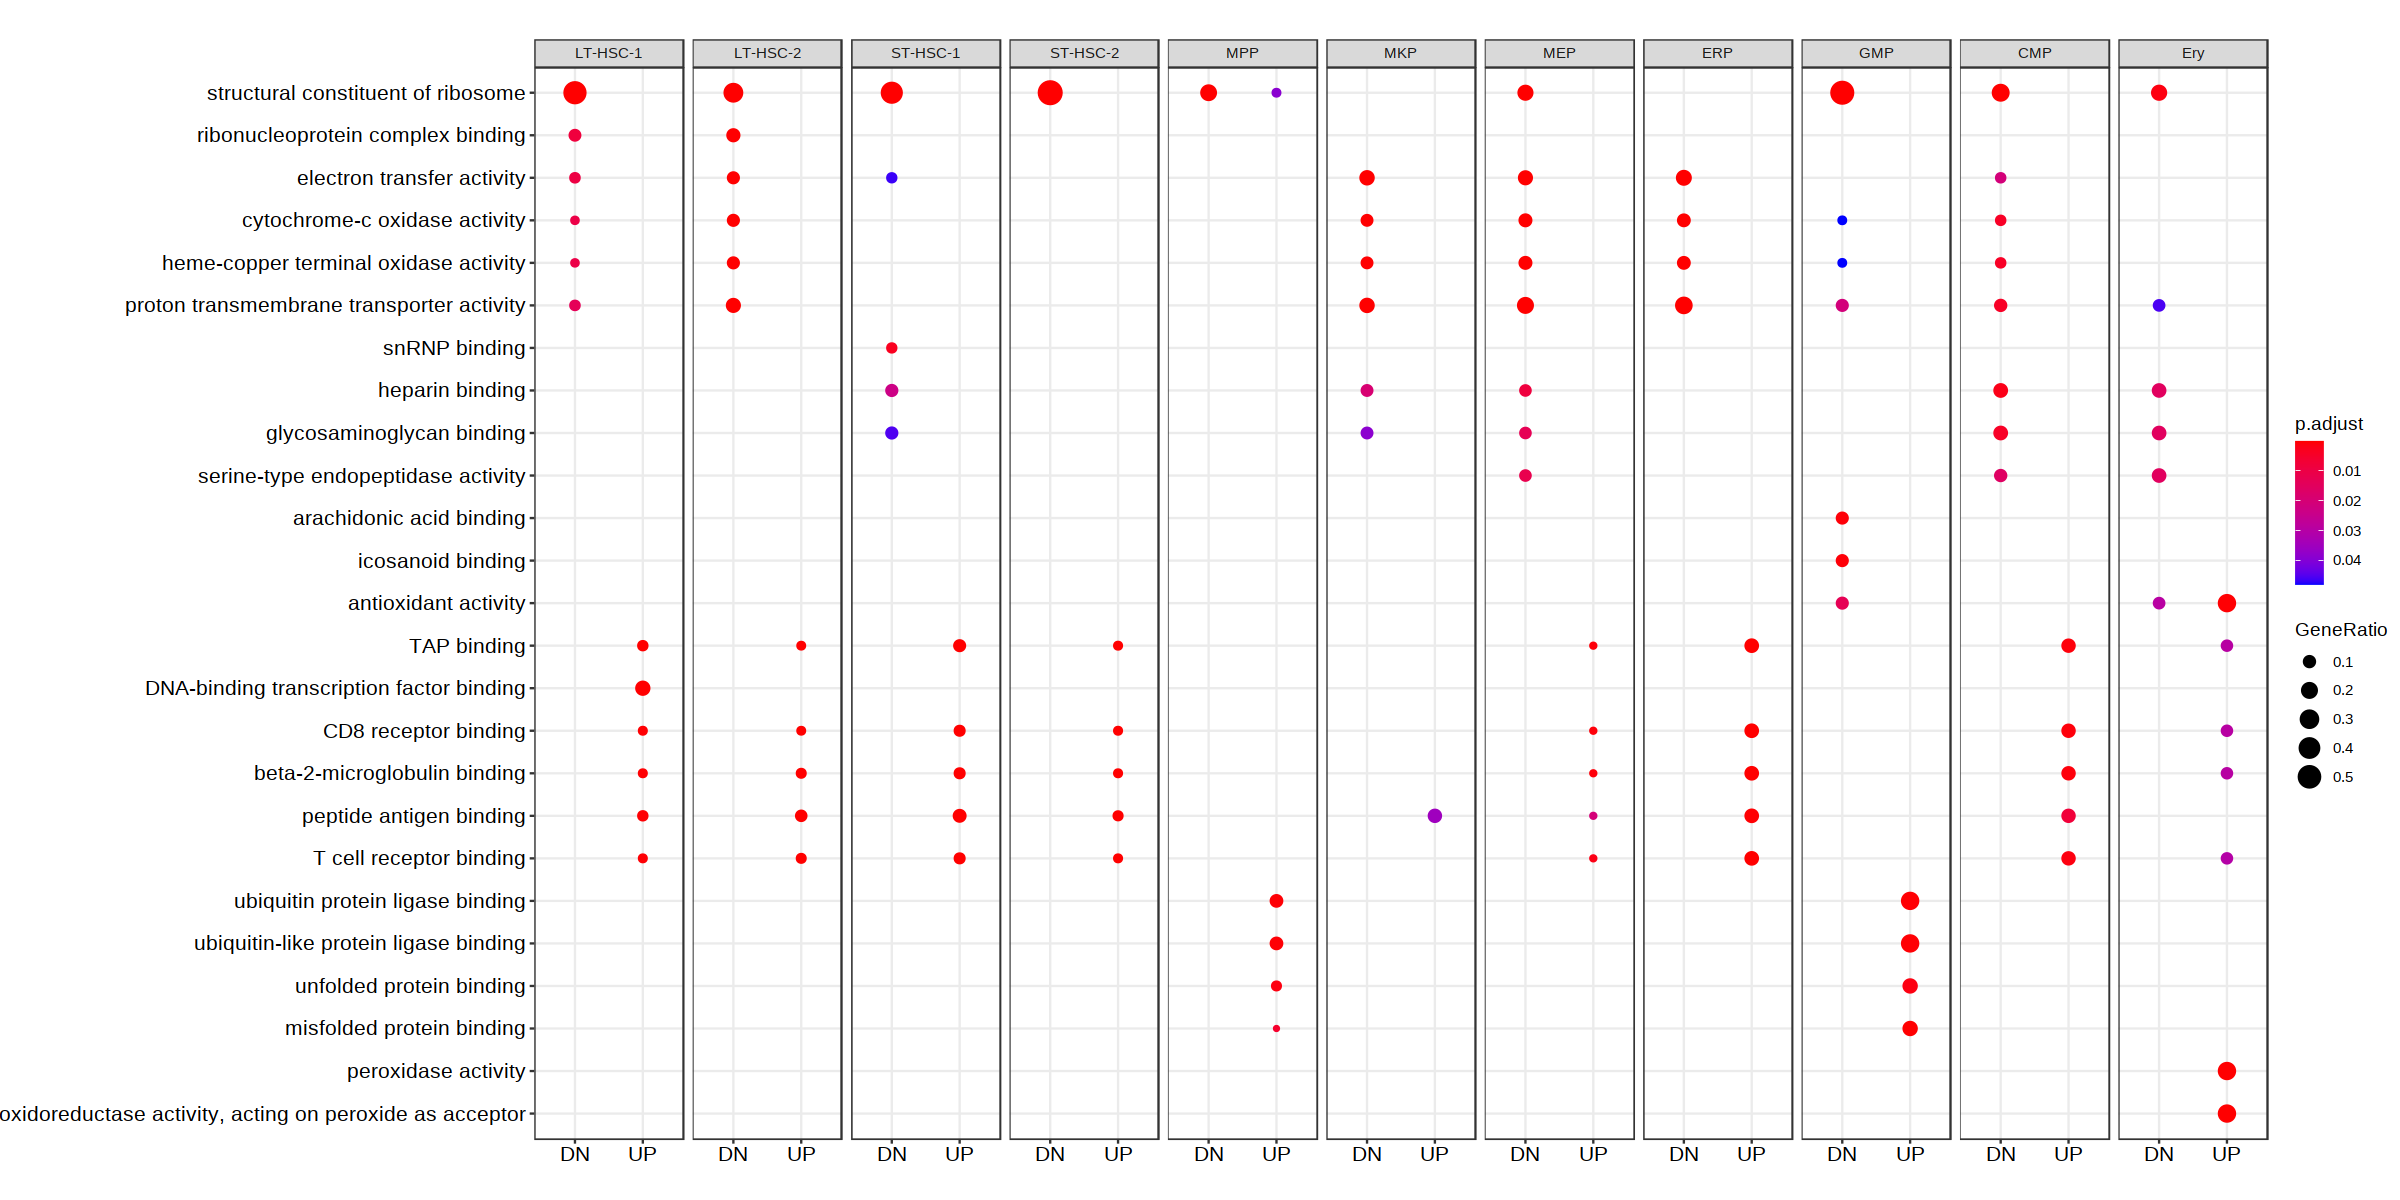

In [42]:
dotplot(formula_res_MF2, x=~group,showCategory=3) + ggplot2::facet_grid(~factor(sc, levels=c('LT-HSC-1','LT-HSC-2','ST-HSC-1','ST-HSC-2','MPP','MKP','MEP','ERP','GMP','CMP','Ery')))

In [13]:
lapply(all_degs$Cluster, function(x) str_replace(x, "\\.", "-"))

[[1]]
[1] "LT-HSC-1"

[[2]]
[1] "LT-HSC-1"

[[3]]
[1] "LT-HSC-1"

[[4]]
[1] "LT-HSC-1"

[[5]]
[1] "LT-HSC-1"

[[6]]
[1] "LT-HSC-1"

[[7]]
[1] "LT-HSC-1"

[[8]]
[1] "LT-HSC-1"

[[9]]
[1] "LT-HSC-1"

[[10]]
[1] "LT-HSC-1"

[[11]]
[1] "LT-HSC-1"

[[12]]
[1] "LT-HSC-1"

[[13]]
[1] "LT-HSC-1"

[[14]]
[1] "LT-HSC-1"

[[15]]
[1] "LT-HSC-1"

[[16]]
[1] "LT-HSC-1"

[[17]]
[1] "LT-HSC-1"

[[18]]
[1] "LT-HSC-1"

[[19]]
[1] "LT-HSC-1"

[[20]]
[1] "LT-HSC-1"

[[21]]
[1] "LT-HSC-1"

[[22]]
[1] "LT-HSC-1"

[[23]]
[1] "LT-HSC-1"

[[24]]
[1] "LT-HSC-1"

[[25]]
[1] "LT-HSC-1"

[[26]]
[1] "LT-HSC-1"

[[27]]
[1] "LT-HSC-1"

[[28]]
[1] "LT-HSC-1"

[[29]]
[1] "LT-HSC-1"

[[30]]
[1] "LT-HSC-1"

[[31]]
[1] "LT-HSC-1"

[[32]]
[1] "LT-HSC-1"

[[33]]
[1] "LT-HSC-1"

[[34]]
[1] "LT-HSC-1"

[[35]]
[1] "LT-HSC-1"

[[36]]
[1] "LT-HSC-1"

[[37]]
[1] "LT-HSC-1"

[[38]]
[1] "LT-HSC-1"

[[39]]
[1] "LT-HSC-1"

[[40]]
[1] "LT-HSC-1"

[[41]]
[1] "LT-HSC-1"

[[42]]
[1] "LT-HSC-1"

[[43]]
[1] "LT-HSC-1"

[[44]]
[1] "LT-HSC-1"

[[45]]
[1] "LT-HSC-1"

[[46]]
[1] "LT-HSC-1"

[[47]]
[1] "LT-HSC-1"

[[48]]
[1] "LT-HSC-1"

[[49]]
[1] "LT-HSC-1"

[[50]]
[1] "LT-HSC-1"

[[51]]
[1] "LT-HSC-1"

[[52]]
[1] "LT-HSC-1"

[[53]]
[1] "LT-HSC-1"

[[54]]
[1] "LT-HSC-1"

[[55]]
[1] "LT-HSC-1"

[[56]]
[1] "LT-HSC-1"

[[57]]
[1] "LT-HSC-1"

[[58]]
[1] "LT-HSC-1"

[[59]]
[1] "LT-HSC-1"

[[60]]
[1] "LT-HSC-1"

[[61]]
[1] "LT-HSC-1"

[[62]]
[1] "LT-HSC-1"

[[63]]
[1] "LT-HSC-1"

[[64]]
[1] "LT-HSC-1"

[[65]]
[1] "LT-HSC-1"

[[66]]
[1] "LT-HSC-1"

[[67]]
[1] "LT-HSC-1"

[[68]]
[1] "LT-HSC-1"

[[69]]
[1] "LT-HSC-1"

[[70]]
[1] "LT-HSC-1"

[[71]]
[1] "LT-HSC-1"

[[72]]
[1] "LT-HSC-1"

[[73]]
[1] "LT-HSC-1"

[[74]]
[1] "LT-HSC-1"

[[75]]
[1] "LT-HSC-1"

[[76]]
[1] "LT-HSC-1"

[[77]]
[1] "LT-HSC-1"

[[78]]
[1] "LT-HSC-1"

[[79]]
[1] "LT-HSC-1"

[[80]]
[1] "LT-HSC-1"

[[81]]
[1] "LT-HSC-1"

[[82]]
[1] "LT-HSC-1"

[[83]]
[1] "LT-HSC-1"

[[84]]
[1] "LT-HSC-1"

[[85]]
[1] "LT-HSC-1"

[[86]]
[1] "LT-HSC-1"

[[87]]
[1] "LT-HSC-1"

[[88]]
[1] "LT-HSC-1"

[[89]]
[1] "LT-HSC-1"

[[90]]
[1] "LT-HSC-1"

[[91]]
[1] "LT-HSC-1"

[[92]]
[1] "LT-HSC-1"

[[93]]
[1] "LT-HSC-1"

[[94]]
[1] "LT-HSC-1"

[[95]]
[1] "LT-HSC-1"

[[96]]
[1] "LT-HSC-1"

[[97]]
[1] "LT-HSC-1"

[[98]]
[1] "LT-HSC-1"

[[99]]
[1] "LT-HSC-1"

[[100]]
[1] "LT-HSC-1"

[[101]]
[1] "LT-HSC-1"

[[102]]
[1] "LT-HSC-1"

[[103]]
[1] "LT-HSC-1"

[[104]]
[1] "LT-HSC-1"

[[105]]
[1] "LT-HSC-1"

[[106]]
[1] "LT-HSC-1"

[[107]]
[1] "LT-HSC-1"

[[108]]
[1] "LT-HSC-1"

[[109]]
[1] "LT-HSC-1"

[[110]]
[1] "LT-HSC-1"

[[111]]
[1] "LT-HSC-1"

[[112]]
[1] "LT-HSC-1"

[[113]]
[1] "LT-HSC-1"

[[114]]
[1] "LT-HSC-1"

[[115]]
[1] "LT-HSC-1"

[[116]]
[1] "LT-HSC-1"

[[117]]
[1] "LT-HSC-2"

[[118]]
[1] "LT-HSC-2"

[[119]]
[1] "LT-HSC-2"

[[120]]
[1] "LT-HSC-2"

[[121]]
[1] "LT-HSC-2"

[[122]]
[1] "LT-HSC-2"

[[123]]
[1] "LT-HSC-2"

[[124]]
[1] "LT-HSC-2"

[[125]]
[1] "LT-HSC-2"

[[126]]
[1] "LT-HSC-2"

[[127]]
[1] "LT-HSC-2"

[[128]]
[1] "LT-HSC-2"

[[129]]
[1] "LT-HSC-2"

[[130]]
[1] "LT-HSC-2"

[[131]]
[1] "LT-HSC-2"

[[132]]
[1] "LT-HSC-2"

[[133]]
[1] "LT-HSC-2"

[[134]]
[1] "LT-HSC-2"

[[135]]
[1] "LT-HSC-2"

[[136]]
[1] "LT-HSC-2"

[[137]]
[1] "LT-HSC-2"

[[138]]
[1] "LT-HSC-2"

[[139]]
[1] "LT-HSC-2"

[[140]]
[1] "LT-HSC-2"

[[141]]
[1] "LT-HSC-2"

[[142]]
[1] "LT-HSC-2"

[[143]]
[1] "LT-HSC-2"

[[144]]
[1] "LT-HSC-2"

[[145]]
[1] "LT-HSC-2"

[[146]]
[1] "LT-HSC-2"

[[147]]
[1] "LT-HSC-2"

[[148]]
[1] "LT-HSC-2"

[[149]]
[1] "LT-HSC-2"

[[150]]
[1] "LT-HSC-2"

[[151]]
[1] "LT-HSC-2"

[[152]]
[1] "LT-HSC-2"

[[153]]
[1] "LT-HSC-2"

[[154]]
[1] "LT-HSC-2"

[[155]]
[1] "LT-HSC-2"

[[156]]
[1] "LT-HSC-2"

[[157]]
[1] "LT-HSC-2"

[[158]]
[1] "LT-HSC-2"

[[159]]
[1] "LT-HSC-2"

[[160]]
[1] "LT-HSC-2"

[[161]]
[1] "LT-HSC-2"

[[162]]
[1] "LT-HSC-2"

[[163]]
[1] "LT-HSC-2"

[[164]]
[1] "LT-HSC-2"

[[165]]
[1] "LT-HSC-2"

[[166]]
[1] "LT-HSC-2"

[[167]]
[1] "LT-HSC-2"

[[168]]
[1] "LT-HSC-2"

[[169]]
[1] "LT-HSC-2"

[[170]]
[1] "LT-HSC-2"

[[171]]
[1] "LT-HSC-2"

[[17